In [5]:
import pandas as pd
relationship = pd.read_csv('relationship.csv')
relationship = relationship[abs(relationship['PointGap']) < 11]
relationship.set_index(['PointGap'], inplace=True)
relationship

,HomeWin,Draw,AwayWin,HomeWinRate,DrawRate,AwayWinRate
PointGap,,,,,,
-10,13,12,23,0.270833,0.250000,0.479167
-9,8,5,18,0.258065,0.161290,0.580645
-8,14,22,46,0.170732,0.268293,0.560976
-7,24,26,79,0.186047,0.201550,0.612403
-6,52,52,123,0.229075,0.229075,0.541850
-5,86,72,157,0.273016,0.228571,0.498413
-4,134,108,166,0.328431,0.264706,0.406863
-3,167,139,205,0.326810,0.272016,0.401174
-2,239,149,207,0.401681,0.250420,0.347899


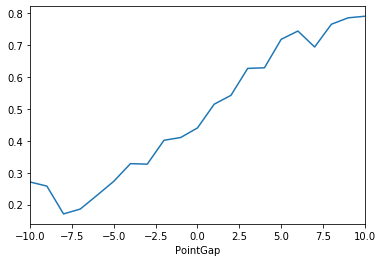

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
HWR = relationship['HomeWinRate']
HWR.plot()

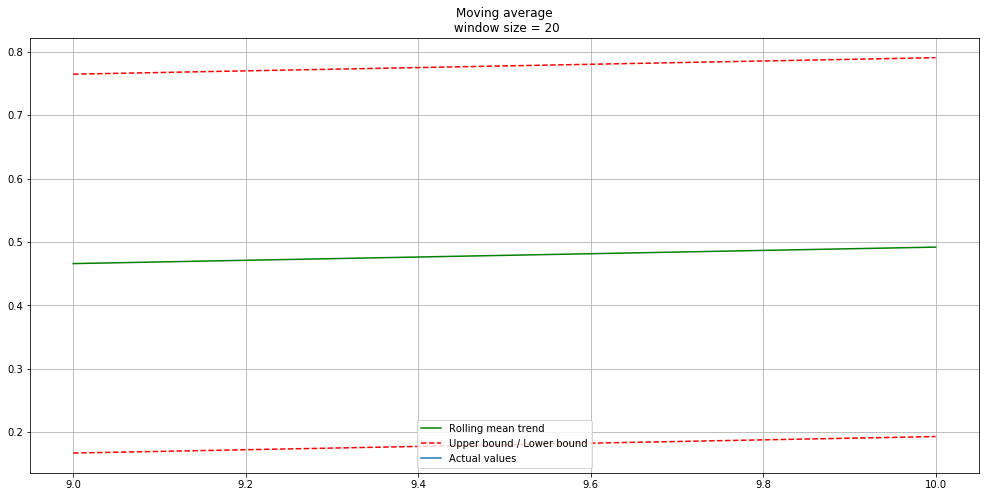

In [13]:
import numpy as np
from sklearn.metrics import mean_absolute_error
#def mean_absolute_percentage_error(y_true, y_pred):
#    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    rolling_mean = series.rolling(window=window).mean()
 
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')

    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')

    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

#Smooth by the previous 5 days (by week)
plot_moving_average(relationship.HomeWinRate, 20, plot_intervals=True)

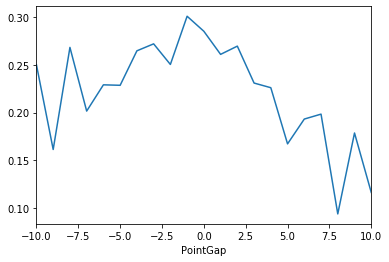

In [7]:
DR = relationship['DrawRate']
DR.plot()

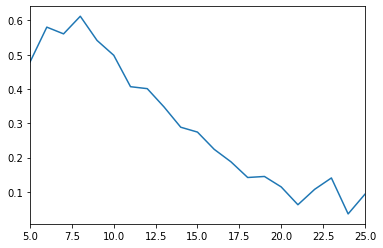

In [4]:
AWR = relationship['AwayWinRate']
AWR.plot()